In [1]:
#import first required libraries

import pandas as pd
import numpy as np
import warnings


#link to the required csv-file

report2=pd.read_csv('report2.csv') 

warnings.filterwarnings('ignore') #the red warning does not show up any more


In [2]:
#Target: try to predict a market value(=value) with features which present the skills and the performance of player



#fill Nan with zero

report2.fillna(0)


,ID,value,finishing,dribbling,attacking,crossing,curve,long_passing,ball_control,shot_power,short_passing,wage,interceptions
0,16,600000.0,64,69,337,68,79.0,71,71,75,76,7000,71.0
1,41,5500000.0,69,85,367,75,80.0,83,90,67,90,12000,70.0
2,80,2800000.0,66,77,342,80,83.0,85,81,77,84,44000,62.0
3,330,5500000.0,84,82,380,68,82.0,63,84,81,81,10000,34.0
4,1179,2200000.0,15,26,95,13,20.0,35,28,56,37,41000,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16697,259088,550000.0,23,44,197,35,26.0,34,56,48,47,2000,58.0
16698,259090,130000.0,43,57,248,50,42.0,61,54,51,64,3000,50.0
16699,259091,130000.0,34,52,218,55,43.0,36,47,28,42,2000,55.0
16700,259101,475000.0,26,55,223,62,43.0,57,57,51,60,3000,58.0


In [3]:
report2=report2.set_index('ID')


data_corr = report2.corr()
data_corr


,value,finishing,dribbling,attacking,crossing,curve,long_passing,ball_control,shot_power,short_passing,wage,interceptions
value,1.000000,0.234052,0.262444,0.293106,0.252805,0.278359,0.311615,0.298180,0.341598,0.332537,0.832831,0.154854
finishing,0.234052,1.000000,0.822099,0.879961,0.651778,0.761626,0.491390,0.784133,0.727469,0.653880,0.210267,-0.063945
dribbling,0.262444,0.822099,1.000000,0.916972,0.856032,0.844380,0.708545,0.940933,0.615462,0.843759,0.240556,0.269501
attacking,0.293106,0.879961,0.916972,1.000000,0.844098,0.851648,0.731054,0.936282,0.706402,0.881753,0.284607,0.312338
crossing,0.252805,0.651778,0.856032,0.844098,1.000000,0.833153,0.736425,0.834961,0.530402,0.798593,0.244142,0.397722
curve,0.278359,0.761626,0.844380,0.851648,0.833153,1.000000,0.694387,0.824232,0.682962,0.765859,0.265353,0.239514
long_passing,0.311615,0.491390,0.708545,0.731054,0.736425,0.694387,1.000000,0.774604,0.523139,0.886204,0.305125,0.592224
ball_control,0.298180,0.784133,0.940933,0.936282,0.834961,0.824232,0.774604,1.000000,0.618084,0.915244,0.282904,0.391411
shot_power,0.341598,0.727469,0.615462,0.706402,0.530402,0.682962,0.523139,0.618084,1.000000,0.577972,0.326635,0.036553
short_passing,0.332537,0.653880,0.843759,0.881753,0.798593,0.765859,0.886204,0.915244,0.577972,1.000000,0.317681,0.534242


In [4]:
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)

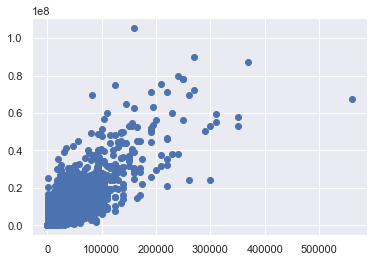

In [5]:
#wage and value have a very high correlation

plt.scatter(report2['wage'], report2['value'])
plt.show()

<AxesSubplot:>

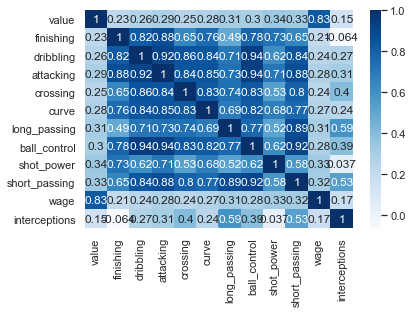

In [6]:

sns.heatmap(report2.corr(),cmap='Blues',annot=True)



In [7]:
from sklearn.preprocessing import Normalizer
y = report2['value']
#X = report2.drop(['value'], axis=1)
X = report2[['wage']]

In [8]:
#check if there are NaN

report2.isna().sum().sort_values(ascending = False)


interceptions    0
wage             0
short_passing    0
shot_power       0
ball_control     0
long_passing     0
curve            0
crossing         0
attacking        0
dribbling        0
finishing        0
value            0
dtype: int64

In [9]:
#transformer = Normalizer()
#transformer.fit(report2)

#x_normalized = transformer.transform(report2)
#x_normalized

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


lm = LinearRegression() # start the model object
model = lm.fit(X,y) # fit your regression line / train the model

predictions = lm.predict(X) # predict some values
rmse = mean_squared_error(y, predictions, squared=False) # or mse with squared=True



In [11]:
print("R2_score:", round(lm.score(X,y),2)) # or r2_score(Y, predictions)
print("RMSE:", rmse)

R2_score: 0.69
RMSE: 3003525.487383986


<AxesSubplot:xlabel='wage', ylabel='value'>

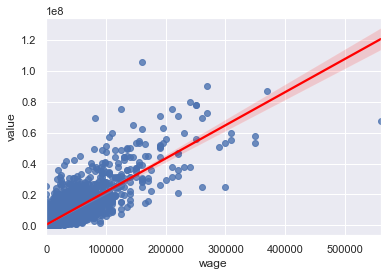

In [16]:
sns.regplot(X['wage'], y, line_kws={"color": "red"})

<AxesSubplot:xlabel='value'>

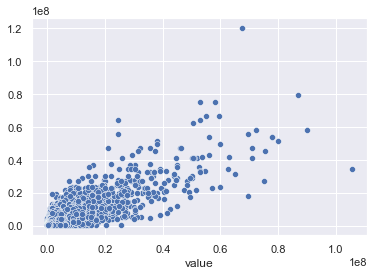

In [13]:
sns.scatterplot(y,predictions)

<AxesSubplot:xlabel='value', ylabel='value'>

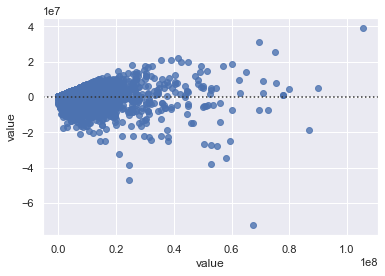

In [14]:
residuals = y - predictions
sns.residplot(y,residuals)